# Import Packages

In [46]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae

In [47]:
clean_df, data = read_data('../../datasets/yt_subscribers.csv', debug=True)

         Date  Subscribers  Unnamed: 2  Unnamed: 3  Unnamed: 4
0   8/26/2024           40         NaN         NaN         NaN
1  10/13/2024           39         NaN         NaN         NaN
2   3/28/2024           38         NaN         NaN         NaN
3   8/25/2024           38         NaN         NaN         NaN
4   7/18/2024           37         NaN         NaN         NaN
5   9/16/2024           36         NaN         NaN         NaN
6   8/10/2024           34         NaN         NaN         NaN
7   7/26/2024           33         NaN         NaN         NaN
8    9/1/2024           33         NaN         NaN         NaN
9   11/4/2024           33         NaN         NaN         NaN
----------------------------------------------------
          Date  Subscribers
254 2023-11-15           13
336 2023-11-16            8
349 2023-11-17            6
301 2023-11-18           10
215 2023-11-19           15
180 2023-11-20           17
361 2023-11-21            3
337 2023-11-22            8
35

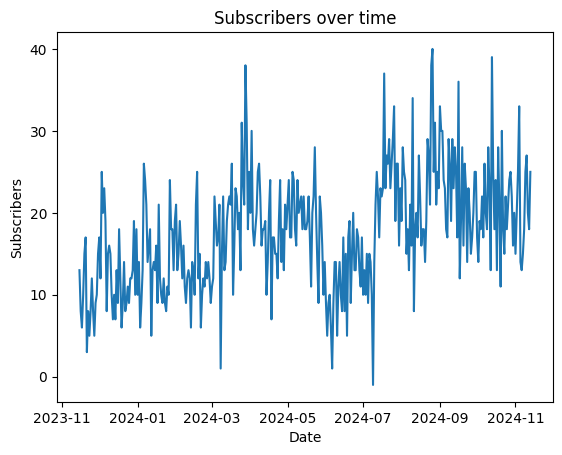

In [48]:
plot_data(clean_df["Subscribers"], title="Subscribers over time", x_label="Date", y_label="Subscribers")

In [49]:
x_train, x_test, y_train, y_test, scaler = prepare_train_test_data(data, time_step_in=7, time_step_out=7, test_size=0.2)

x_train shape: (280, 7), y_train shape: (280, 7), x_test shape: (71, 7), y_test shape: (71, 7)


# model definition

In [50]:
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(7,1)))
lstm_model.add(LSTM(50,return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(7))
lstm_model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.03), metrics=['mean_absolute_error'])
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 7, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,157 (199.83 KB)

 Trainable params: 51,157 (199.83 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history=lstm_model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1,
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.4810 - mean_absolute_error: 0.4810 - val_loss: 0.1412 - val_mean_absolute_error: 0.1412
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - val_loss: 0.1385 - val_mean_absolute_error: 0.1385
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - val_loss: 0.1310 - val_mean_absolute_error: 0.1310
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - val_loss: 0.1232 - val_mean_absolute_error: 0.1232
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - val_loss: 0.1312 - val_mean_absolute_error: 0.1312
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - val_loss: 0.1248 - val_mean_absolute_error: 0.1248
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - val_loss: 0.1297 - v

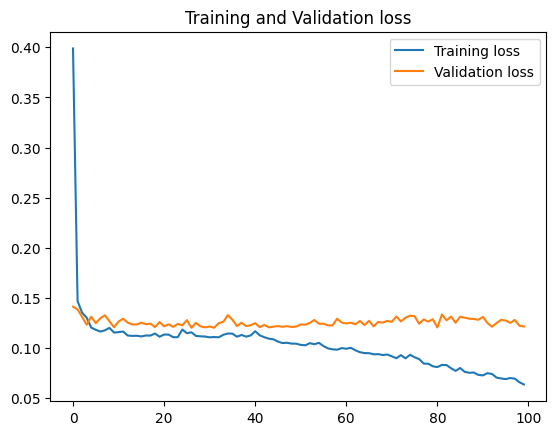

In [52]:
history_plot(history)

In [53]:
train_predicted=lstm_model.predict(x_train)
test_predicted=lstm_model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [54]:
mae_error_train= mae(y_train,train_predicted)
mae_error_test= mae(y_test,test_predicted)
print(f"MAE Train data  : {mae_error_train} ")
print(f"MAE  Test data : {mae_error_test} ")

MAE Train data  : 0.05889030077678127 
MAE  Test data : 0.12143595906666105 


In [63]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 6): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    y_temp = lstm_model.predict(input_window.reshape(1, -1))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0])  # Add all predicted values from y_temp to the list
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0]  

Step 1 ==> Input Window: [0.46341463 0.34146341 0.53658537 0.46341463 0.53658537 0.58974359
 0.43902439]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction Output (y_temp): [[0.35832044 0.48685637 0.47267148 0.415272   0.44595054 0.39021492
  0.5813469 ]]
Step 2 ==> Input Window: [0.34146341 0.53658537 0.46341463 0.53658537 0.58974359 0.43902439
 0.35832044]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction Output (y_temp): [[0.5545924  0.5248543  0.48110172 0.48619708 0.45598346 0.4584107
  0.53956395]]
Step 3 ==> Input Window: [0.53658537 0.46341463 0.53658537 0.58974359 0.43902439 0.35832044
 0.55459237]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction Output (y_temp): [[0.5010548  0.45047727 0.50861794 0.44851202 0.46886164 0.503898
  0.5198715 ]]
Step 4 ==> Input Window: [0.46341463 0.53658537 0.58974359 0.43902439 0.35832044 0.55459237
 0.50105482]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Output (y_temp): [[0.47057617 0.5107399  0.46129704 0.40278795 0.47401285 0.48014122
  

In [ ]:
all_predictions=np.array(all_predictions)
all_predictions

array([0.35832044, 0.48685637, 0.47267148, 0.415272  , 0.44595054,
       0.39021492, 0.5813469 , 0.5545924 , 0.5248543 , 0.48110172,
       0.48619708, 0.45598346, 0.4584107 , 0.53956395, 0.5010548 ,
       0.45047727, 0.50861794, 0.44851202, 0.46886164, 0.503898  ,
       0.5198715 , 0.47057617, 0.5107399 , 0.46129704, 0.40278795,
       0.47401285, 0.48014122, 0.49674118, 0.48023415, 0.49532965,
       0.4122516 , 0.4048819 , 0.50129485, 0.46884802, 0.4721493 ],
      dtype=float32)

In [81]:
num_samples = len(all_predictions) // 7
all_predictions_reshaped = all_predictions.reshape(num_samples, 7)
y_next_30 = scaler.inverse_transform(all_predictions_reshaped)
y_next_30=np.round(y_next_30)
print(y_next_30)

[[14. 19. 18. 16. 17. 16. 23.]
 [22. 21. 19. 19. 18. 19. 21.]
 [20. 17. 20. 17. 18. 21. 20.]
 [18. 20. 18. 16. 18. 20. 19.]
 [19. 19. 16. 16. 20. 19. 18.]]


In [83]:
x_test=scaler.inverse_transform(x_test)
x_train=scaler.inverse_transform(x_train)

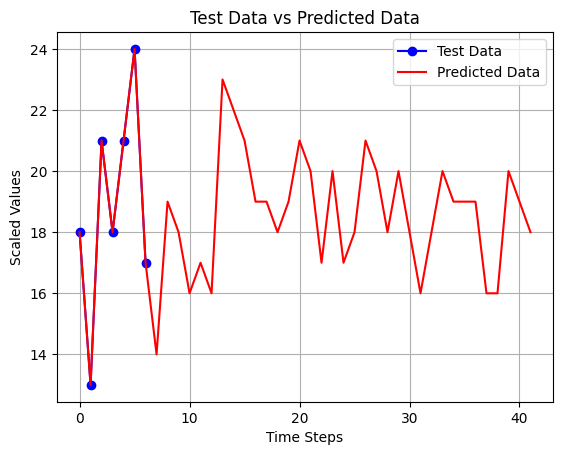

In [91]:
plt.plot(x_test[-1], label='Test Data', color='blue', marker='o')
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red')
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
last_date = clean_df.index[-1]
total_sub=np.sum(clean_df["Subscribers"])
total_next_30=np.sum(y_next_30)
print(f"Total subscribers till {last_date}: {total_sub}, next_30_days: {total_next_30} => final after 30 days: {total_sub + total_next_30}")

Total subscribers till 2024-11-13 00:00:00: 6383, next_30_days: 651.0 => final after 30 days: 7034.0


In [86]:
avg_sub = np.mean(np.array(clean_df['Subscribers']))
avg_sub * 7

122.41369863013699